# Python Collections

## Beyond lists, dicts, and sets: more powerful collections

Import needed library

In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap
import geopy

## Using namedtuple to describe records efficiently

In [4]:
open('goldmedals.txt', 'r').readlines()[:10]

['1896\tThomas Burke\tUSA\t100m men\n',
 '1896\tThomas Curtis\tUSA\t110m hurdles men\n',
 '1896\tEdwin Flack\tAUS\t1500m men\n',
 '1896\tThomas Burke\tUSA\t400m men\n',
 '1896\tEdwin Flack\tAUS\t800m men\n',
 '1896\tRobert Garrett\tUSA\tdiscus throw men\n',
 '1896\tEllery Clark\tUSA\thigh jump men\n',
 '1896\tEllery Clark\tUSA\tlong jump men\n',
 '1896\tSpyridon Louis\tGRE\tmarathon men\n',
 '1896\tWilliam Welles Hoyt\tUSA\tpole vault men\n']

In [5]:
medal = collections.namedtuple('medal', ['year', 'athlete', 'team', 'event'])

In [6]:
m = medal('1896', 'Thomas Burke', 'USA', 'men')
m

medal(year='1896', athlete='Thomas Burke', team='USA', event='men')

In [7]:
m.year, m.athlete

('1896', 'Thomas Burke')

In [8]:
medals = [medal(*line.strip().split('\t')) for line in open('goldmedals.txt', 'r')]
medals[:5]

[medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men'),
 medal(year='1896', athlete='Thomas Curtis', team='USA', event='110m hurdles men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='1500m men'),
 medal(year='1896', athlete='Thomas Burke', team='USA', event='400m men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='800m men')]

## Using counters to count repeated elements in a sequence

In [9]:
medals_per_team = collections.Counter(medal.team for medal in medals)
medals_per_team

Counter({'USA': 521,
         'AUS': 23,
         'GRE': 7,
         'GBR': 71,
         'CAN': 21,
         'ZZX': 5,
         'HUN': 10,
         'FRA': 14,
         'RSA': 8,
         'SWE': 21,
         'FIN': 60,
         'NOR': 7,
         'ITA': 19,
         'GER': 18,
         'POL': 27,
         'IRL': 4,
         'JPN': 7,
         'ARG': 2,
         'NZL': 10,
         'TCH': 11,
         'NED': 9,
         'JAM': 42,
         'BEL': 4,
         'AUT': 1,
         'LUX': 1,
         'URS': 79,
         'BRA': 5,
         'EUA': 7,
         'ROU': 11,
         'ETH': 22,
         'KEN': 33,
         'TUN': 1,
         'GDR': 50,
         'FRG': 15,
         'UGA': 2,
         'TRI': 2,
         'MEX': 3,
         'CUB': 10,
         'BUL': 5,
         'MAR': 6,
         'POR': 4,
         'CHN': 8,
         'ESP': 3,
         'ALG': 4,
         'EUN': 12,
         'LTU': 3,
         'KOR': 1,
         'RUS': 29,
         'ECU': 1,
         'BDI': 1,
         'SYR': 1,
       

In [10]:
medals_per_team.most_common(10)

[('USA', 521),
 ('URS', 79),
 ('GBR', 71),
 ('FIN', 60),
 ('GDR', 50),
 ('JAM', 42),
 ('KEN', 33),
 ('RUS', 29),
 ('POL', 27),
 ('AUS', 23)]

In [11]:
def best_by_year(year):
    counts = collections.Counter(medal.team for medal in medals if medal.year == str(year))
    best = counts.most_common(5)
    return [b[0] for b in best], [b[1] for b in best]

In [12]:
best_by_year(1980)

(['URS', 'GDR', 'GBR', 'ITA', 'ETH'], [24, 14, 4, 3, 2])

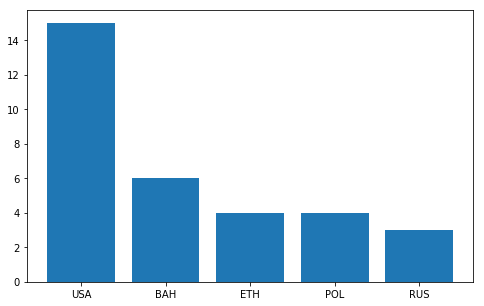

In [13]:
countries, tally = best_by_year(2000)
plt.figure(figsize = (8, 5))
plt.bar(np.arange(5), tally, align = 'center')
plt.xticks(np.arange(5), countries)
plt.show()

In [14]:
plt.style.use('ggplot')
colors = plt.cm.Set2(np.linspace(0, 1, 5))

def plot_year(year):
    countries, tally = best_by_year(year)
    bars = plt.bar(np.arange(5), tally, align = 'center')
    plt.xticks(np.arange(5), countries)
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    plt.title(year)

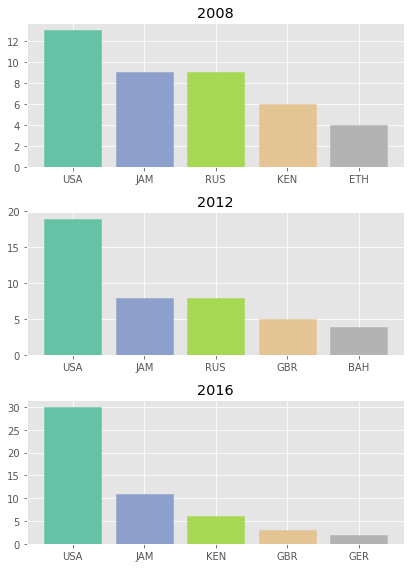

In [15]:
plt.figure(figsize = (6, 8))

plt.subplot(3, 1, 1); plot_year(2008)
plt.subplot(3, 1, 2); plot_year(2012)
plt.subplot(3, 1, 3); plot_year(2016)
plt.tight_layout()

In [16]:
winners_by_country = {}

for medal in medals:
    if medal.team not in winners_by_country:
        winners_by_country[medal.team] = [medal.athlete]
    else:
        winners_by_country[medal.team].append(medal.athlete)
        
winners_by_country['FRA']

['Michel Theato',
 'Joseph Guillemot',
 'Boughera Mohamed El Ouafi',
 'Micheline Ostermeyer',
 'Micheline Ostermeyer',
 'Alain Mimoun',
 'Colette Besson',
 'Guy Drut',
 'Pierre Quinon',
 'Marie-Jose Perec',
 'Marie-Jose Perec',
 'Marie-Jose Perec',
 'Jean Galfione',
 'Renaud Lavillenie']

## Using defaultdict and OrderedDict to handle default values and ordered keys

In [35]:
# same thing but more efficiently with collections
winners_by_country = collections.defaultdict(list)

for medal in medals:
    winners_by_country[medal.team].append(medal.athlete)
    
winners_by_country['ITA']

['Ugo Frigerio',
 'Ugo Frigerio',
 'Ugo Frigerio',
 'Luigi Beccali',
 'Trebisonda Valla',
 'Adolfo Consolini',
 'Giuseppe Dordoni',
 'Livio Berruti',
 'Abdon Pamich',
 'Pietro Mennea',
 'Maurizio Damilano',
 'Sara Simeoni',
 'Alberto Cova',
 'Gabriella Dorio',
 'Alessandro Andrei',
 'Gelindo Bordin',
 'Ivano Brugnetti',
 'Stefano Baldini',
 'Alex Schwazer']

In [37]:
ordered_winners = collections.OrderedDict()

for medal in medals:
    if medal.team == 'FRA':
        ordered_winners[medal.athlete] = medal.event + ' ' + medal.year

In [38]:
ordered_winners

OrderedDict([('Michel Theato', 'marathon men 1900'),
             ('Joseph Guillemot', '5000m men 1920'),
             ('Boughera Mohamed El Ouafi', 'marathon men 1928'),
             ('Micheline Ostermeyer', 'shot put women 1948'),
             ('Alain Mimoun', 'marathon men 1956'),
             ('Colette Besson', '400m women 1968'),
             ('Guy Drut', '110m hurdles men 1976'),
             ('Pierre Quinon', 'pole vault men 1984'),
             ('Marie-Jose Perec', '400m women 1996'),
             ('Jean Galfione', 'pole vault men 1996'),
             ('Renaud Lavillenie', 'pole vault men 2012')])

In [39]:
# compared to a regular dict
{medal.athlete: medal.event + ' ' + medal.year for medal in medals if medal.team == 'FRA'}

{'Michel Theato': 'marathon men 1900',
 'Joseph Guillemot': '5000m men 1920',
 'Boughera Mohamed El Ouafi': 'marathon men 1928',
 'Micheline Ostermeyer': 'shot put women 1948',
 'Alain Mimoun': 'marathon men 1956',
 'Colette Besson': '400m women 1968',
 'Guy Drut': '110m hurdles men 1976',
 'Pierre Quinon': 'pole vault men 1984',
 'Marie-Jose Perec': '400m women 1996',
 'Jean Galfione': 'pole vault men 1996',
 'Renaud Lavillenie': 'pole vault men 2012'}

## Using deque to manipulate double-ended queues

collection deque implements a double ended queue where you can append or pop on either side

In [40]:
dq = collections.deque(range(10))
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
for i in range(10, 15):
    dq.append(i)
    dq.popleft()
    print(dq)

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


In [43]:
for i in reversed(range(10, 15)):
    dq.appendleft(i)
    dq.pop()
    print(dq)

deque([14, 5, 6, 7, 8, 9, 10, 11, 12, 13])
deque([13, 14, 5, 6, 7, 8, 9, 10, 11, 12])
deque([12, 13, 14, 5, 6, 7, 8, 9, 10, 11])
deque([11, 12, 13, 14, 5, 6, 7, 8, 9, 10])
deque([10, 11, 12, 13, 14, 5, 6, 7, 8, 9])
